# Crowdedness Visualizations
Contains Data Exploration for the crowdedness sensor data

## Imports

In [18]:
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import Files

In [5]:
#Full Crowdedness Dataset
crowd_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Crowdedness.csv")

crowd_df = crowd_df.drop_duplicates(subset="Sensor").reset_index().drop(columns={"index"})

crowd_df

,Sensor,Date,Hour,SensorLongitude,SensorLatitude,CrowdednessCount
0,GAWW-01,2018-03-11,100,4.899847,52.374601,3133
1,GAWW-02,2018-03-11,0,4.898903,52.373786,0
2,GAWW-03,2018-07-01,0,4.897334,52.372524,2959
3,GAWW-04,2018-03-11,100,4.897908,52.373283,886
4,GAWW-05,2018-03-11,100,4.897717,52.372353,2707
5,GAWW-06,2018-03-11,100,4.898053,52.372416,3640
6,GAWW-07,2018-03-11,100,4.900441,52.374414,1350
7,GAWW-08,2018-03-11,100,4.897193,52.371650,29
8,GAWW-09,2018-03-11,100,4.898479,52.375040,73
9,GAWW-10,2018-03-11,100,4.898808,52.372369,38


In [6]:
#Map to plot sensors on
road_map = gpd.read_file("../../../Data_thesis/MapShapeFiles/roads.shp")

## Visualizations

### Geo Map

#### Variables

In [7]:
#Coordinate system
crs = {"init": "epsg:4326"}

#Longitude & Latitude zipped
# #Create a point object -> Point is essentially a single object that describes the longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(crowd_df["SensorLongitude"], crowd_df["SensorLatitude"])]

#### DF Construction

In [8]:
crowd_geo_df = gpd.GeoDataFrame(crowd_df,
                         crs = crs,
                         geometry = geometry)

crowd_geo_df = crowd_geo_df.drop(columns=["SensorLongitude", "SensorLatitude", "Date", "Hour", "CrowdednessCount"])

In [9]:
crowd_geo_df

,Sensor,geometry
0,GAWW-01,POINT (4.8998471 52.3746006)
1,GAWW-02,POINT (4.8989027 52.3737857)
2,GAWW-03,POINT (4.8973336 52.3725237)
3,GAWW-04,POINT (4.897907599999999 52.373283)
4,GAWW-05,POINT (4.8977166 52.3723534)
5,GAWW-06,POINT (4.898053099999999 52.37241599999999)
6,GAWW-07,POINT (4.9004405 52.37441389999999)
7,GAWW-08,POINT (4.897192700000001 52.3716503)
8,GAWW-09,POINT (4.8984795 52.3750398)
9,GAWW-10,POINT (4.8988079 52.372369)


#### Map

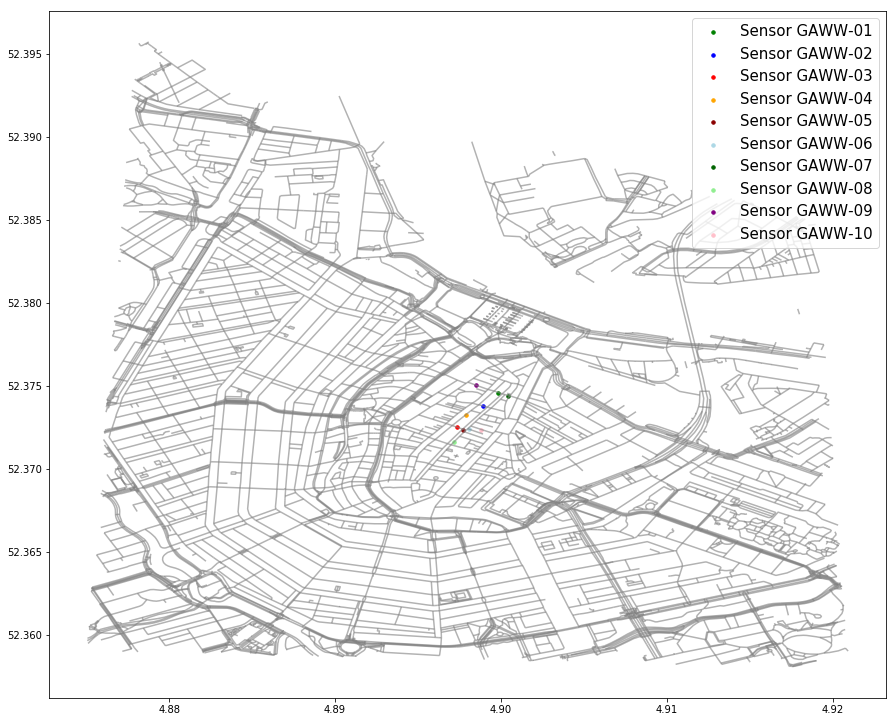

In [24]:
fig,ax = plt.subplots(figsize = (15, 15))
road_map.plot(ax = ax, alpha = 0.6, color = "grey")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-01"].plot(ax = ax, markersize = 12, color = "green", marker = "o", 
                                                       label = "Sensor GAWW-01")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-02"].plot(ax = ax, markersize = 12, color = "blue", marker = "o", 
                                                       label = "Sensor GAWW-02")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-03"].plot(ax = ax, markersize = 12, color = "red", marker = "o", 
                                                       label = "Sensor GAWW-03")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-04"].plot(ax = ax, markersize = 12, color = "orange", marker = "o", 
                                                       label = "Sensor GAWW-04")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-05"].plot(ax = ax, markersize = 12, color = "darkred", marker = "o", 
                                                       label = "Sensor GAWW-05")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-06"].plot(ax = ax, markersize = 12, color = "lightblue", marker = "o", 
                                                       label = "Sensor GAWW-06")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-07"].plot(ax = ax, markersize = 12, color = "darkgreen", marker = "o", 
                                                       label = "Sensor GAWW-07")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-08"].plot(ax = ax, markersize = 12, color = "lightgreen", marker = "o", 
                                                       label = "Sensor GAWW-08")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-09"].plot(ax = ax, markersize = 12, color = "purple", marker = "o", 
                                                       label = "Sensor GAWW-09")
crowd_geo_df[crowd_geo_df["Sensor"] == "GAWW-10"].plot(ax = ax, markersize = 12, color = "pink", marker = "o", 
                                                       label = "Sensor GAWW-10")

plt.legend(prop={"size": 15})

### Camera Counts

#### Sensor GAWW-02

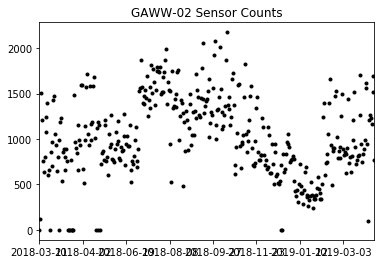

In [18]:
counts_gaww02 = crowd_df[crowd_df["Sensor"] == "GAWW-02"]

#Select usable columns plot
counts_gaww02 = counts_gaww02[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww02 = counts_gaww02.drop(columns=["index"])

#Df to dict
counts_gaww02_dict = counts_gaww02.to_dict("index")

#Dict that the series will be based on 
counts_gaww02_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww02_dict.items():
    counts_gaww02_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww02_series = pd.Series(counts_gaww02_series_dict)

#plot the series
counts_gaww02_series.plot(style='k.', title="GAWW-02 Sensor Counts")
plt.show()

#### Sensor GAWW-03

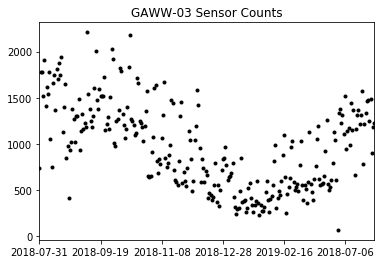

In [19]:
counts_gaww03 = crowd_df[crowd_df["Sensor"] == "GAWW-03"]

#Select usable columns plot
counts_gaww03 = counts_gaww03[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww03 = counts_gaww03.drop(columns=["index"])

#Df to dict
counts_gaww03_dict = counts_gaww03.to_dict("index")

#Dict that the series will be based on 
counts_gaww03_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww03_dict.items():
    counts_gaww03_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww03_series = pd.Series(counts_gaww03_series_dict)

#plot the series
counts_gaww03_series.plot(style='k.', title="GAWW-03 Sensor Counts")
plt.show()